# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [546]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [547]:


# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])




# Display the data table for preview
pyber_data_df.head(100)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
95,Williamsstad,3/29/2019 21:43,35.58,4.747780e+12,59,Urban
96,North Jason,3/8/2019 20:06,25.21,3.180080e+12,6,Urban
97,Christopherfurt,4/17/2019 2:25,23.30,7.819060e+12,41,Urban
98,Liumouth,1/11/2019 17:15,36.78,1.464520e+12,69,Urban


## Deliverable 1: Get a Summary DataFrame 

In [548]:


#  1. Get the total rides for each city type

Total_Rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides





type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [549]:
# 2. Get the total drivers for each city type

Total_Drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers.head()



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [550]:
#  3. Get the total amount of fares for each city type.


Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [551]:
#  4. Get the average fare per ride for each city type. 


Total_fares = pyber_data_df["fare"].mean()

average_fare_per_ride =   Total_Fares / Total_Rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [552]:
# 5. Get the average fare per driver for each city type. 



Total_Drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

average_fare_per_driver =   Total_Fares / Total_Drivers
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [553]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df =['Rural','Suburban','Urban']

pyber_summary_df = pd.Series(pyber_summary_df)
pyber_summary_df

pyber_summary_df = pd.DataFrame(
{"Total Rides": Total_Rides,
    "Total Drivers": Total_Drivers,
    "Total Fares": Total_Fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [554]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [555]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df


pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df



plt.savefig("C:/Users/rhutc/OneDrive/Desktop/DU_Class_Folder/PyBer_Analysis/Analysis/Pyber_fare_summary_df.png")

plt.show()

<Figure size 432x288 with 0 Axes>

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [556]:
# 1. Read the merged DataFrame


# total_weekly_fares_new_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])




In [557]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_weekly_fares_new_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_weekly_fares_new_df




type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [558]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.


total_weekly_fares_new_df = total_weekly_fares_new_df.reset_index()
total_weekly_fares_new_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [559]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_weekly_fares_new_df = total_weekly_fares_new_df.pivot(index="date", columns="type", values="fare")
total_weekly_fares_new_df







type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [560]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_date_df = total_weekly_fares_new_df.loc['2019-01-01':'2019-04-28']
new_date_df



type,Rural,Suburban,Urban
date,,,


In [561]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.



new_date_df.index = pd.to_datetime(new_date_df.index)
new_date_df.head()










type,Rural,Suburban,Urban
date,,,


In [562]:
# 7. Check that the datatype for the index is datetime using df.info()


new_date_df.info()










<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [563]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


resampled_new_date_df = new_date_df.resample("W").sum()
resampled_new_date_df.head(100)











type,Rural,Suburban,Urban
date,,,


ValueError: zero-size array to reduction operation fmin which has no identity

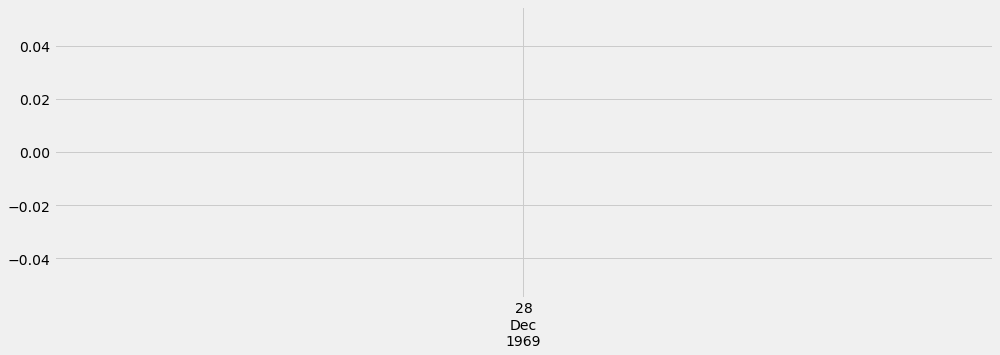

In [564]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


ax = resampled_new_date_df.plot(figsize=(15,5))


ax.set_title("Total Fare by City Type")

ax.set_xlabel("")
ax.set_ylabel("Fare($)USD")





plt.savefig("C:/Users/rhutc/OneDrive/Desktop/DU_Class_Folder/PyBer_Analysis/Analysis/Pyber_fare_summary.png")



